In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv("C:/Users/Aditya/Desktop/Credit Card/fraudTrain.csv")
test = pd.read_csv("C:/Users/Aditya/Desktop/Credit Card/fraudTest.csv")

In [4]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test.head()

In [5]:
train.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
## Checking for Data Balance:

train['is_fraud'].value_counts(normalize = True)
train['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [7]:
## Separating Day, Month and Year:

train['trans_day'] = pd.to_datetime(train['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.day
train['trans_month'] = pd.to_datetime(train['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.month
train['trans_year'] = pd.to_datetime(train['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.year

In [8]:
# Separating Hour and Minutes: 

train['trans_hour'] = pd.to_datetime(train['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.hour
train['trans_minutes'] = pd.to_datetime(train['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.minute

In [9]:
train.drop(['trans_date_trans_time'], axis = 1, inplace = True)

In [ ]:
train.sample(3)

In [10]:
train.drop(['first','last','street','zip','lat','long','merch_lat','merch_long'], axis = 1, inplace = True)

In [11]:
train['Age'] = pd.to_datetime('today').year - pd.to_datetime(train['dob']).dt.year

In [12]:
train.drop(['dob'], axis = 1, inplace = True)

In [ ]:
train.sample(3)

In [13]:
## finding unique numbers:

for feature in train.columns[:]:
    print (feature,":", len(train[feature].unique()),'lables')

cc_num : 983 lables
merchant : 693 lables
category : 14 lables
amt : 52928 lables
gender : 2 lables
city : 894 lables
state : 51 lables
city_pop : 879 lables
job : 494 lables
trans_num : 1296675 lables
unix_time : 1274823 lables
is_fraud : 2 lables
trans_day : 31 lables
trans_month : 12 lables
trans_year : 2 lables
trans_hour : 24 lables
trans_minutes : 60 lables
Age : 81 lables


In [14]:
cate_map = train['category'].value_counts().to_dict()
train['category'] = train['category'].map(cate_map)

In [ ]:
train.sample(5)

In [15]:
train['gender'] = np.where(train['gender'] == "F",0,1)

In [16]:
city_map=train['city'].value_counts().to_dict()
train['city']=train['city'].map(city_map)

In [17]:
state_map=train['state'].value_counts().to_dict()
train['state']=train['state'].map(state_map)
train.head()

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,trans_num,unix_time,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minutes,Age
0,2703186189652095,"fraud_Rippin, Kub and Mann",63287,4.97,0,2028,30266,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,0,1,1,2019,0,0,32
1,630423337322,"fraud_Heller, Gutmann and Zieme",123638,107.23,0,3545,18924,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,0,1,1,2019,0,0,42
2,38859492057661,fraud_Lind-Buckridge,94014,220.11,1,503,5545,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,1,1,2019,0,0,58
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",131659,45.00,1,493,11754,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,0,1,1,2019,0,1,53
4,375534208663984,fraud_Keeling-Crist,79655,41.96,1,2017,29250,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,0,1,1,2019,0,3,34


In [18]:
merchant_map=train['merchant'].value_counts().to_dict()
train['merchant']=train['merchant'].map(merchant_map)
train.head()

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,trans_num,unix_time,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minutes,Age
0,2703186189652095,1267,63287,4.97,0,2028,30266,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,0,1,1,2019,0,0,32
1,630423337322,2503,123638,107.23,0,3545,18924,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,0,1,1,2019,0,0,42
2,38859492057661,1895,94014,220.11,1,503,5545,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,1,1,2019,0,0,58
3,3534093764340240,2613,131659,45.00,1,493,11754,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,0,1,1,2019,0,1,53
4,375534208663984,1592,79655,41.96,1,2017,29250,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,0,1,1,2019,0,3,34


In [19]:
job_map=train['job'].value_counts().to_dict()
train['job']=train['job'].map(job_map)
train.head()

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,trans_num,unix_time,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minutes,Age
0,2703186189652095,1267,63287,4.97,0,2028,30266,3495,3545,0b242abb623afc578575680df30655b9,1325376018,0,1,1,2019,0,0,32
1,630423337322,2503,123638,107.23,0,3545,18924,149,5099,1f76529f8574734946361c461b024d99,1325376044,0,1,1,2019,0,0,42
2,38859492057661,1895,94014,220.11,1,503,5545,4154,511,a1a22d70485983eac12b5b88dad1cf95,1325376051,0,1,1,2019,0,0,58
3,3534093764340240,2613,131659,45.00,1,493,11754,1939,2530,6b849c168bdad6f867558c3793159a81,1325376076,0,1,1,2019,0,1,53
4,375534208663984,1592,79655,41.96,1,2017,29250,99,2017,a41d7549acf90789359a9aa5346dcb46,1325376186,0,1,1,2019,0,3,34


In [20]:
# Compute the correlation matrix
corr = train.corr()
corr

,cc_num,merchant,category,amt,gender,city,state,city_pop,job,unix_time,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minutes,Age
cc_num,1.000000,-0.001649,-0.001163,0.001769,0.001112,-0.036620,-0.013382,-0.008991,0.057439,0.000354,-0.000981,0.000545,-0.000281,0.000466,-0.000801,0.000812,-0.000291
merchant,-0.001649,1.000000,0.883707,0.011319,-0.004984,-0.015851,-0.002092,-0.012410,-0.003613,0.000269,0.007968,0.000131,-0.000532,0.000737,-0.096423,0.000451,0.047778
category,-0.001163,0.883707,1.000000,0.010972,-0.005625,-0.018546,-0.002835,-0.014917,-0.003891,-0.000048,0.005784,-0.000524,-0.000717,0.000621,-0.105956,0.000415,0.053614
amt,0.001769,0.011319,0.010972,1.000000,0.001034,-0.008505,0.006272,0.005818,-0.006049,-0.000293,0.219404,0.000629,-0.001748,0.000842,-0.022811,0.000383,-0.009748
gender,0.001112,-0.004984,-0.005625,0.001034,1.000000,-0.140828,-0.029052,-0.028649,-0.096290,-0.000960,0.007642,-0.000206,-0.000215,-0.000654,-0.037835,-0.001239,0.004976
city,-0.036620,-0.015851,-0.018546,-0.008505,-0.140828,1.000000,0.036934,0.273448,0.272248,-0.001206,-0.038308,-0.001507,0.000182,-0.001262,0.082594,0.001655,-0.268768
state,-0.013382,-0.002092,-0.002835,0.006272,-0.029052,0.036934,1.000000,0.168790,0.016491,0.000244,-0.000353,-0.000555,-0.000118,0.000319,0.003968,-0.000782,-0.010582
city_pop,-0.008991,-0.012410,-0.014917,0.005818,-0.028649,0.273448,0.168790,1.000000,0.041274,-0.001714,0.002136,0.000159,0.000137,-0.001673,0.020381,-0.000713,-0.091271
job,0.057439,-0.003613,-0.003891,-0.006049,-0.096290,0.272248,0.016491,0.041274,1.000000,0.000594,-0.020476,0.001093,0.000374,0.000177,0.036188,0.001863,-0.096527
unix_time,0.000354,0.000269,-0.000048,-0.000293,-0.000960,-0.001206,0.000244,-0.001714,0.000594,1.000000,-0.005078,0.017162,0.184868,0.782582,0.000756,0.000006,-0.003655


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

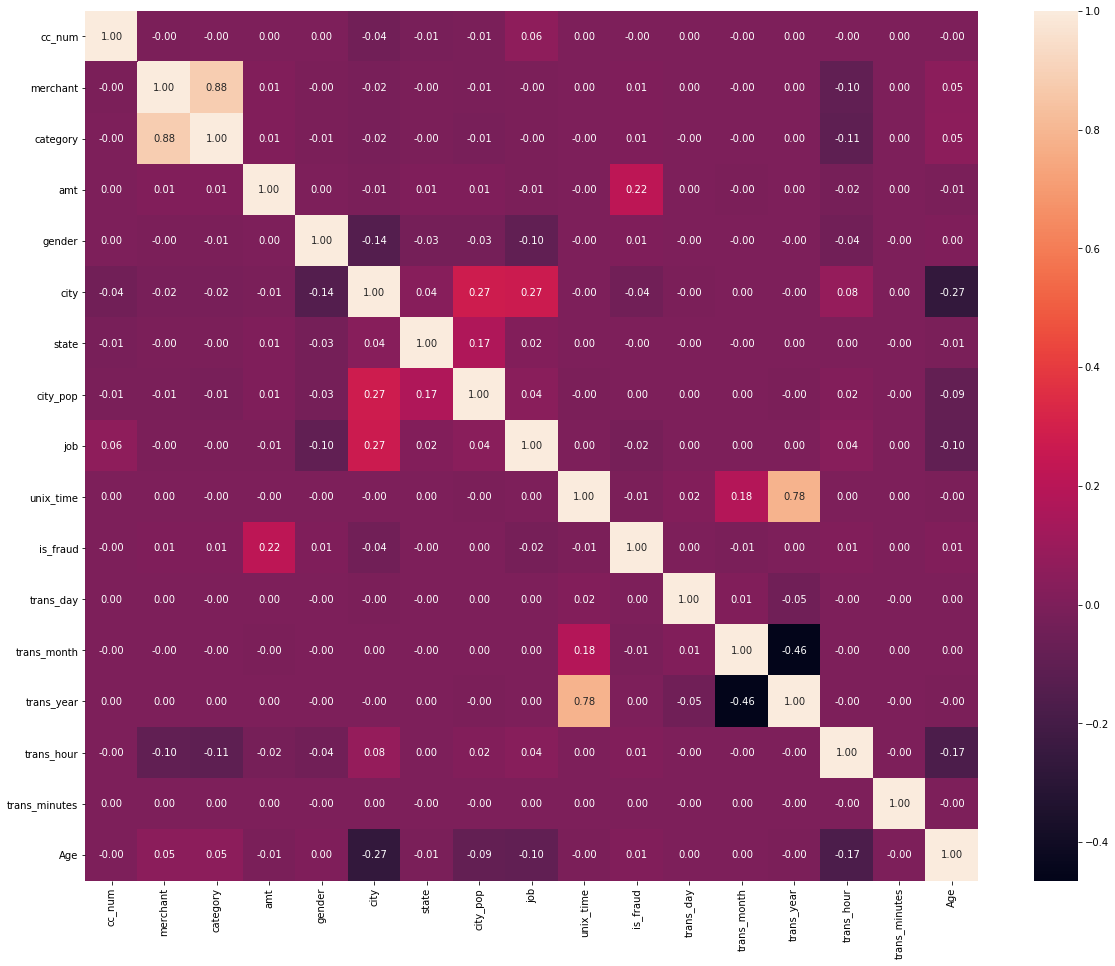

In [22]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20, 16))
sns.heatmap(train.corr(), annot = True,fmt=".2f")

In [23]:
## For Test Data Set:
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

test['trans_day'] = pd.to_datetime(test['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.day
test['trans_month'] = pd.to_datetime(test['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.month
test['trans_year'] = pd.to_datetime(test['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.year

test['trans_hour'] = pd.to_datetime(test['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.hour
test['trans_minutes'] = pd.to_datetime(test['trans_date_trans_time'], format = '%Y-%m-%d %H:%M:%S.%f').dt.minute

test.drop(['trans_date_trans_time'], axis = 1, inplace = True)

test.drop(['first','last','street','zip','lat','long','merch_lat','merch_long'], axis = 1, inplace = True)

test['Age'] = pd.to_datetime('today').year - pd.to_datetime(test['dob']).dt.year

test.drop(['dob'], axis = 1, inplace = True)


## finding unique numbers:

for feature in test.columns[:]:
    print (feature,":", len(test[feature].unique()),'lables')
    
    
cate_map = test['category'].value_counts().to_dict()
test['category'] = test['category'].map(cate_map)


test['gender'] = np.where(test['gender'] == "F",0,1)

state_map=test['state'].value_counts().to_dict()
test['state']=test['state'].map(state_map)
# test.head()

merchant_map=test['merchant'].value_counts().to_dict()
test['merchant']=test['merchant'].map(merchant_map)
# train.head()

job_map=test['job'].value_counts().to_dict()
test['job']=test['job'].map(job_map)
    
city_map=test['city'].value_counts().to_dict()
test['city']=test['city'].map(city_map) 
test.head()

cc_num : 924 lables
merchant : 693 lables
category : 14 lables
amt : 37256 lables
gender : 2 lables
city : 849 lables
state : 50 lables
city_pop : 835 lables
job : 478 lables
trans_num : 555719 lables
unix_time : 544760 lables
is_fraud : 2 lables
trans_day : 31 lables
trans_month : 7 lables
trans_year : 1 lables
trans_hour : 24 lables
trans_minutes : 60 lables
Age : 81 lables


,cc_num,merchant,category,amt,gender,city,state,city_pop,job,trans_num,unix_time,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minutes,Age
0,2291163933867244,736,39327,2.86,1,640,12541,333497,2430,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,21,6,2020,12,14,52
1,3573030041201292,785,39327,29.84,0,837,4658,302,2535,324cc204407e99f51b0d6ca0055005e7,1371816873,0,21,6,2020,12,14,30
2,3598215285024754,755,36674,41.28,0,1073,35918,34496,2587,c81755dbbbea9d5c77f094348a7579be,1371816893,0,21,6,2020,12,14,50
3,3591919803438423,711,34574,60.05,1,663,18104,54767,663,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,21,6,2020,12,15,33
4,3526826139003047,370,17449,3.19,1,891,19671,1126,891,57ff021bd3f328f8738bb535c302a31b,1371816917,0,21,6,2020,12,15,65


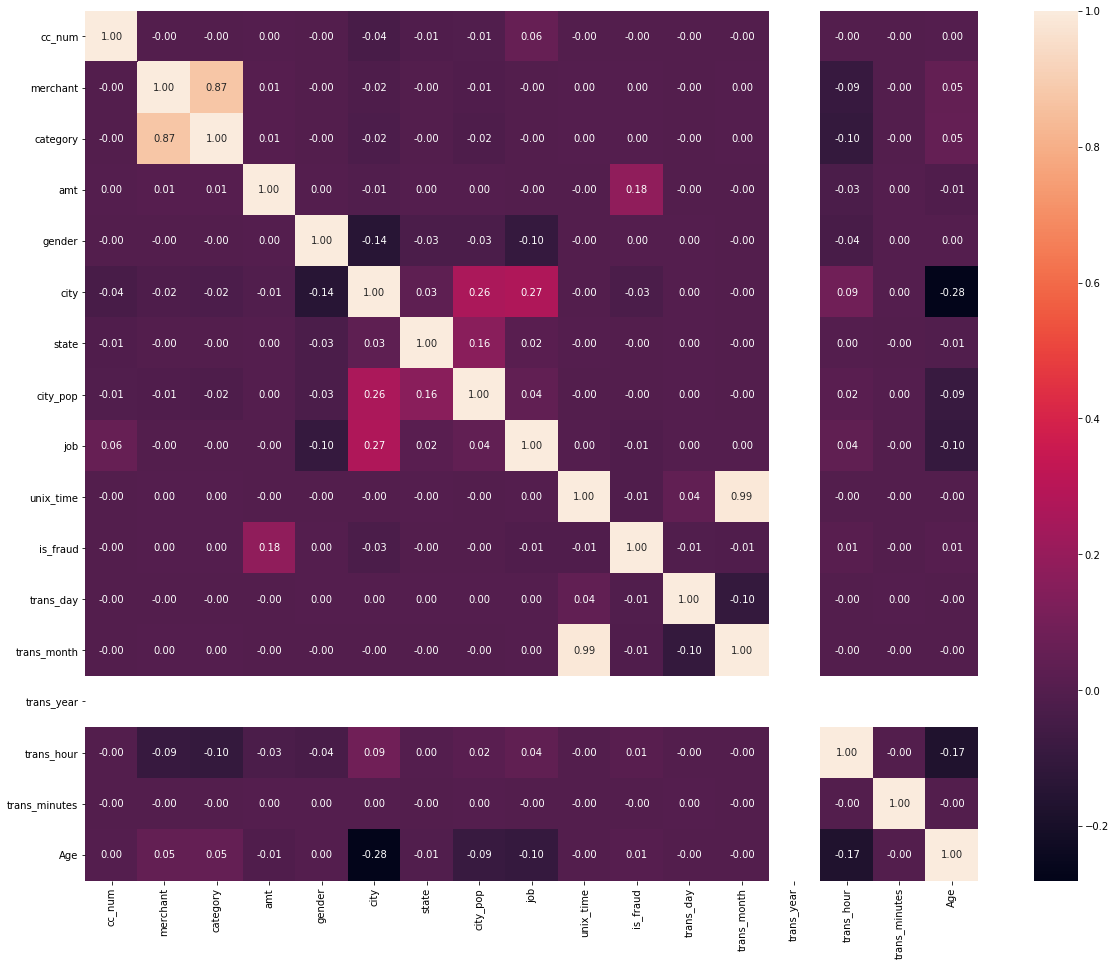

In [24]:
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(20, 16))
sns.heatmap(test.corr(), annot = True,fmt=".2f")

In [25]:
train.drop(['trans_num'], axis = 1, inplace = True)

In [26]:
## Independent and dependent Feature:

X = train.drop("is_fraud", axis = 1)
y = train.is_fraud

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_train.value_counts()

## Oversampling

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from collections import Counter
Counter(y_train)

In [ ]:
os = RandomOverSampler(0.8)

In [ ]:
X_train_ns, y_train_ns = os.fit_sample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_ns, y_train_ns)

In [ ]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))